In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic Numerical Computation Library in Python
import seaborn as sns # For Purpose of Visualization
import matplotlib.pyplot as plt # Plotting Package
import warnings 
warnings.filterwarnings('ignore') # Filtering warnings
%matplotlib inline

In [2]:
# importing dataset Train CSV file using Pandas libarary
df = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


### Dataset Information :
- **Dataset consist of two CSV files, one for training model & other for testing dataset.**
- **Training dataset contain 1168 Rows & 81 Columns.**
- **We can see there are some missing values are present in dataset.**

In [4]:
# As we have too many columns let sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [5]:
df.duplicated().sum()

0

In [6]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

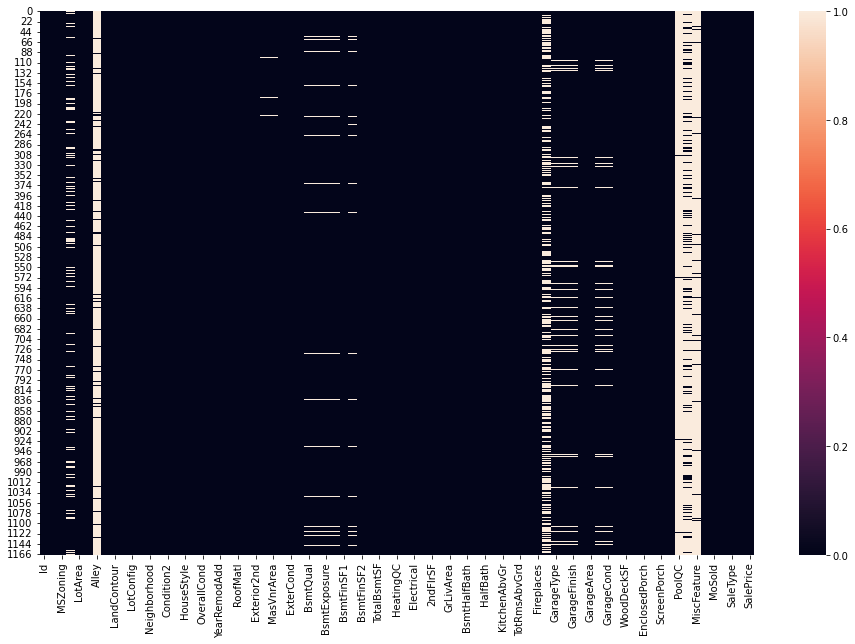

In [7]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [8]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                   1161       99.400685
MiscFeature              1124       96.232877
Alley                    1091       93.407534
Fence                     931       79.708904
FireplaceQu               551       47.174658
LotFrontage               214       18.321918
GarageYrBlt                64        5.479452
GarageFinish               64        5.479452
GarageType                 64        5.479452
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtCond                   30        2.568493
BsmtFinType1               30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
Id                          0        0.000000
Functional                  0        0.000000
Fireplaces                  0     

In [9]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

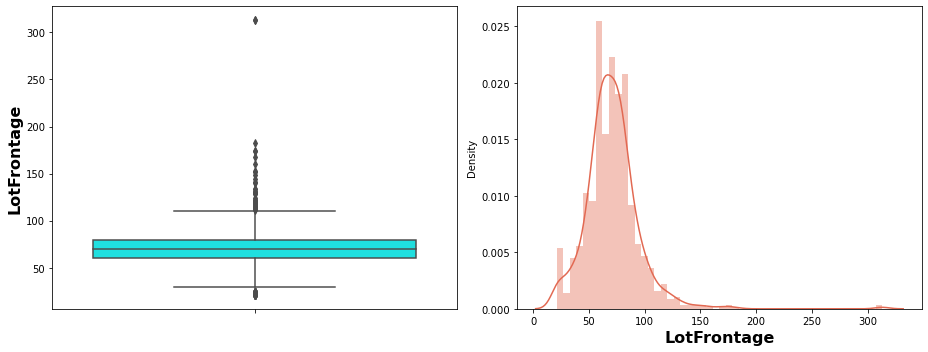

In [11]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'LotFrontage', data= df, color='cyan')
plt.ylabel('LotFrontage', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(df['LotFrontage'])
plt.xlabel('LotFrontage', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
print('Mean of LotFrontage:',df['LotFrontage'].mean())
print('Median of LotFrontage:',df['LotFrontage'].median())

Mean of LotFrontage: 70.98846960167715
Median of LotFrontage: 70.0


In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [14]:
df['LotFrontage'].isnull().any()

False

In [15]:
df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [16]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [17]:
df['GarageType'].value_counts()

Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [18]:
df['GarageType'].isnull().any()

False

In [19]:
df['GarageYrBlt'].mode()[0]

2006.0

In [20]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [21]:
df['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [22]:
df['GarageFinish'].mode()[0]

'Unf'

In [23]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [24]:
df['GarageFinish'].isnull().any()

False

In [25]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtFinType1               30        2.568493
BsmtCond                   30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
KitchenQual                 0        0.000000
KitchenAbvGr                0        0.000000
BedroomAbvGr                0        0.000000
Id                          0        0.000000
Functional                  0        0.000000
HalfBath                    0        0.000000
FullBath                    0        0.000000
BsmtHalfBath                0        0.000000
BsmtFullBath                0        0.000000
GrLivArea                   0        0.000000
LowQualFinSF                0        0.000000
TotRmsAbvGrd                0     

In [26]:
df['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [27]:
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [28]:
df['GarageQual'].isnull().any()

False

In [29]:
df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [30]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [31]:
df['GarageCond'].isnull().any()

False

In [32]:
df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [33]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [34]:
df['BsmtFinType2'].isnull().any()

False

In [35]:
df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [36]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [37]:
df['BsmtExposure'].isnull().any()

False

In [38]:
df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [39]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [40]:
df['BsmtFinType1'].isnull().any()

False

In [41]:
df['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [42]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [43]:
df['BsmtCond'].isnull().any()

False

In [44]:
df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [45]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [46]:
df['BsmtQual'].isnull().any()

False

In [47]:
df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [48]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [49]:
df['MasVnrType'].isnull().any()

False

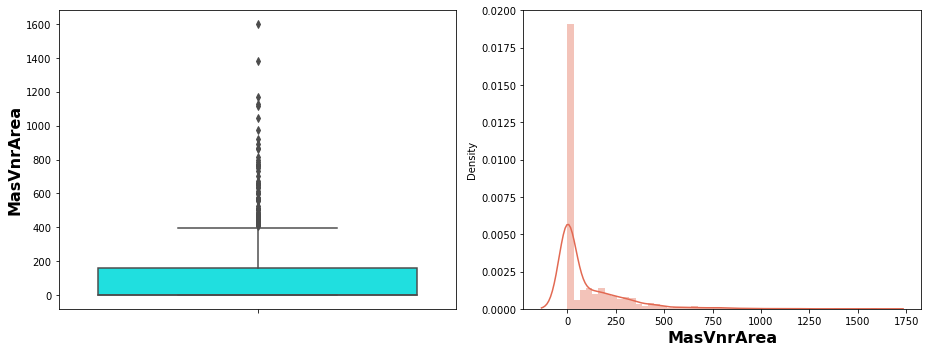

In [50]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'MasVnrArea', data= df, color='cyan')
plt.ylabel('MasVnrArea', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(df['MasVnrArea'])
plt.xlabel('MasVnrArea', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [51]:
print('Mean of MasVnrArea:',df['MasVnrArea'].mean())
print('Median of MasVnrArea:',df['MasVnrArea'].median())

Mean of MasVnrArea: 102.31007751937985
Median of MasVnrArea: 0.0


In [52]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [53]:
df['MasVnrArea'].isnull().any()

False

#### Final Missing Value Check

In [54]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
FullBath                    0             0.0
Fireplaces                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
BsmtHalfBath                0             0.0
MSSubClass                  0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
GarageType                  0             0.0
GarageYrBlt                 0             0.0
GarageFinish                0     

### Statistical Matrix

In [56]:
df.describe().T.style.background_gradient(subset = ['mean','std','count'], cmap = 'gist_earth')

,count,mean,std,min,25%,50%,75%,max
Id,1168.000000,724.136130,416.159877,1.000000,360.500000,714.500000,1079.500000,1460.000000
MSSubClass,1168.000000,56.767979,41.940650,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1168.000000,70.807363,22.440317,21.000000,60.000000,70.000000,79.250000,313.000000
LotArea,1168.000000,10484.749144,8957.442311,1300.000000,7621.500000,9522.500000,11515.500000,164660.000000
OverallQual,1168.000000,6.104452,1.390153,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1168.000000,5.595890,1.124343,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1168.000000,1970.930651,30.145255,1875.000000,1954.000000,1972.000000,2000.000000,2010.000000
YearRemodAdd,1168.000000,1984.758562,20.785185,1950.000000,1966.000000,1993.000000,2004.000000,2010.000000
MasVnrArea,1168.000000,101.696918,182.218483,0.000000,0.000000,0.000000,160.000000,1600.000000
BsmtFinSF1,1168.000000,444.726027,462.664785,0.000000,0.000000,385.500000,714.500000,5644.000000


In [57]:
df.describe(include=object).style.background_gradient(cmap='gist_summer_r')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
unique,5,2,4,4,1,5,3,25,9,8,5,8,6,8,14,15,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,928,1164,740,1046,1168,842,1105,182,1005,1154,981,578,915,1144,396,387,703,717,1022,516,547,1071,787,375,1033,1143,585,1090,1070,578,1085,755,551,1114,1125,1071,999,945


In [58]:
# Converting years column to age column
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_Since'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [59]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

## **Data Cleaning & Preprocessing on Test Dataset**

In [60]:
# Reading Test Dataset
dft = pd.read_csv('test.csv')

In [61]:
print('No. of Rows :',dft.shape[0])
print('No. of Columns :', dft.shape[1])
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
dft.head()

No. of Rows : 292
No. of Columns : 80


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [63]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                    292      100.000000
MiscFeature               282       96.575342
Alley                     278       95.205479
Fence                     248       84.931507
FireplaceQu               139       47.602740
LotFrontage                45       15.410959
GarageType                 17        5.821918
GarageYrBlt                17        5.821918
GarageQual                 17        5.821918
GarageCond                 17        5.821918
GarageFinish               17        5.821918
BsmtCond                    7        2.397260
BsmtFinType2                7        2.397260
BsmtFinType1                7        2.397260
BsmtQual                    7        2.397260
BsmtExposure                7        2.397260
MasVnrArea                  1        0.342466
MasVnrType                  1        0.342466
Electrical                  1        0.342466
HalfBath                    0        0.000000
BsmtFullBath                0     

In [64]:
# Removing columns with high missing value percentage
dft.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [65]:
dft['LotFrontage'] = dft['LotFrontage'].fillna(dft['LotFrontage'].median())
dft['GarageType'] = dft['GarageType'].fillna(dft['GarageType'].mode()[0])
dft['GarageYrBlt']= dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].mode()[0])
dft['GarageFinish']= dft['GarageFinish'].fillna(dft['GarageFinish'].mode()[0])
dft['GarageQual'] = dft['GarageQual'].fillna(dft['GarageQual'].mode()[0])
dft['GarageCond'] = dft['GarageCond'].fillna(dft['GarageCond'].mode()[0])
dft['BsmtFinType2'] = dft['BsmtFinType2'].fillna(dft['BsmtFinType2'].mode()[0])
dft['BsmtExposure'] = dft['BsmtExposure'].fillna(dft['BsmtExposure'].mode()[0])
dft['BsmtFinType1'] = dft['BsmtFinType1'].fillna(dft['BsmtFinType1'].mode()[0])
dft['BsmtCond'] = dft['BsmtCond'].fillna(dft['BsmtCond'].mode()[0])
dft['BsmtQual'] = dft['BsmtQual'].fillna(dft['BsmtQual'].mode()[0])
dft['MasVnrType'] = dft['MasVnrType'].fillna(dft['MasVnrType'].mode()[0])
dft['MasVnrArea'] = dft['MasVnrArea'].fillna(dft['MasVnrArea'].median())
dft['Electrical'] = dft['Electrical'].fillna(dft['Electrical'].mode()[0])

In [66]:
dft.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [67]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
GarageType                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
FullBath                    0             0.0
BsmtHalfBath                0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
Fireplaces                  0             0.0
GarageYrBlt                 0             0.0
Heating                     0             0.0
GarageFinish                0     

**No Missing Value Present in Test Dataset**

In [68]:
# Converting years column to age column
dft['Year_SinceBuilt'] = dft['YearBuilt'].max() - dft['YearBuilt']
dft['Year_SinceRemodAdded'] = dft['YearRemodAdd'].max() - dft['YearRemodAdd']
dft['Year_Since'] = dft['YrSold'].max() - dft['YrSold']
dft['GarageAge'] = dft['GarageYrBlt'].max() - dft['GarageYrBlt']

In [69]:
# Dropping old columns in train dataset
dft.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

## Exploratory Data Analysis

**We know that lot of factors which influences in determination of housing price. One by One we will here explore different factors & its relation to target Variable SalePrice.**

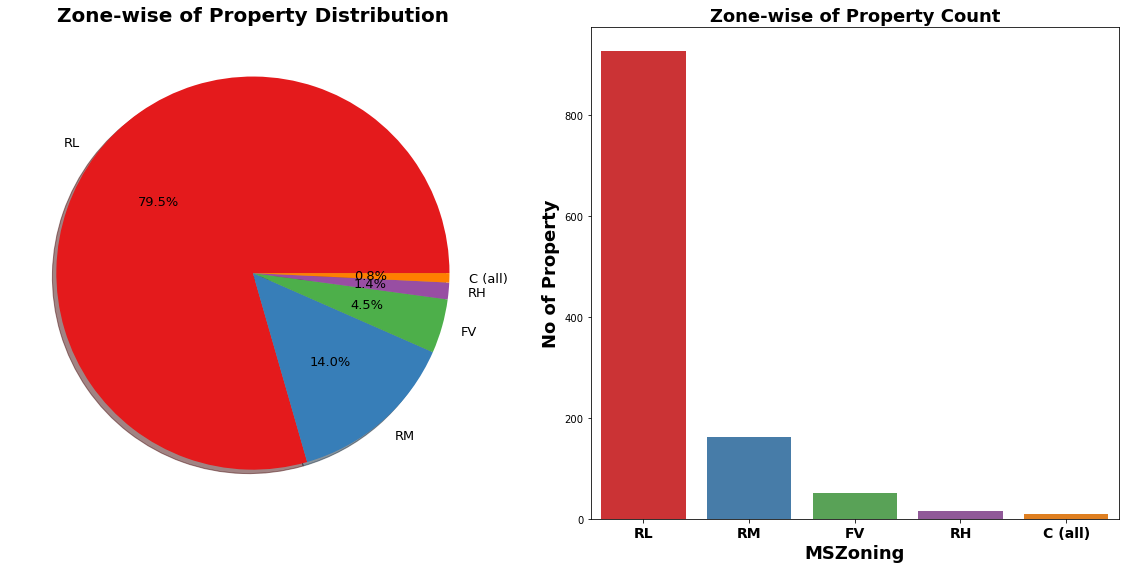

In [70]:
# Exploring MSZoning Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Zone-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('MSZoning',data=df,ax=ax[1])
ax[1].set_title('Zone-wise of Property Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("MSZoning",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

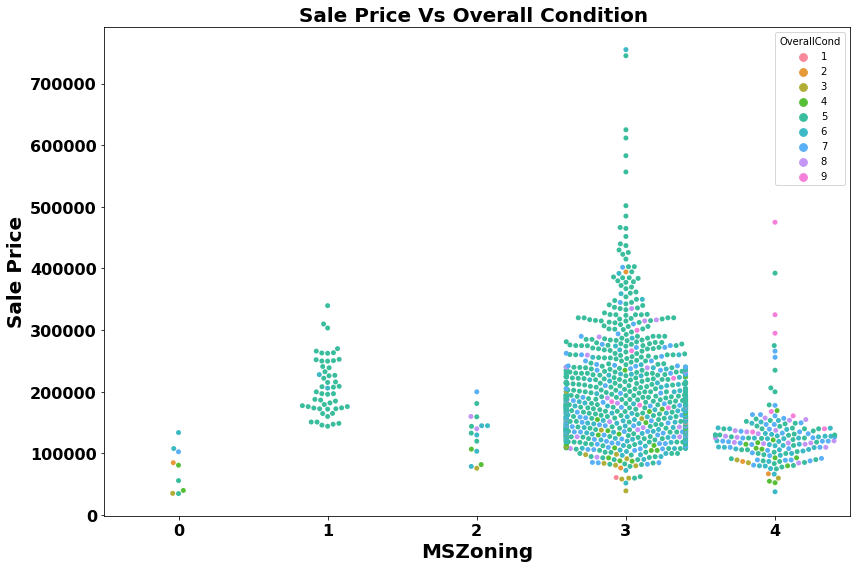

In [138]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('gnuplot2_r')
plt.figure(figsize=(12,8))
sns.swarmplot(y=df['SalePrice'], x=df['MSZoning'], hue =df['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

**LotFrontage: Linear feet of street connected to property**

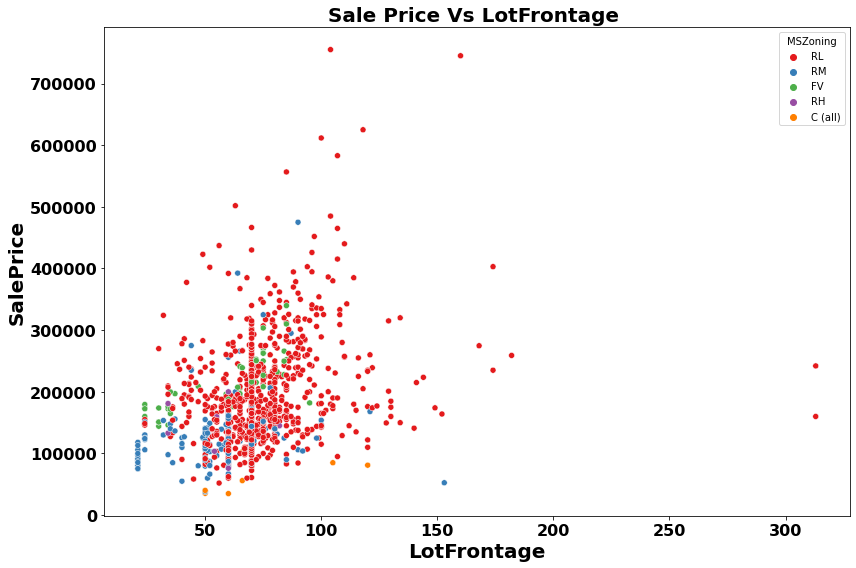

In [71]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotFrontage'], hue =df['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### **How Quality & Area of house affect Pricing?**

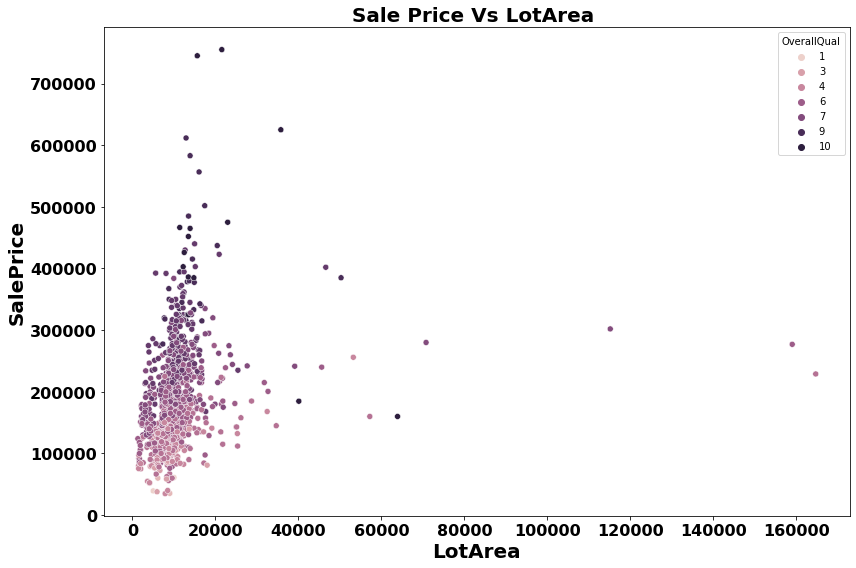

In [71]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

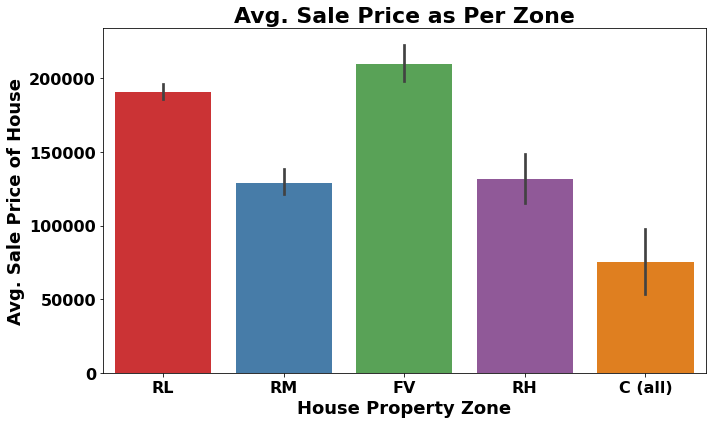

In [72]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette("Set1")
plt.figure(figsize = (10,6))
sns.barplot(y = df['SalePrice'], x= df['MSZoning'])
plt.title('Avg. Sale Price as Per Zone', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Avg. Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

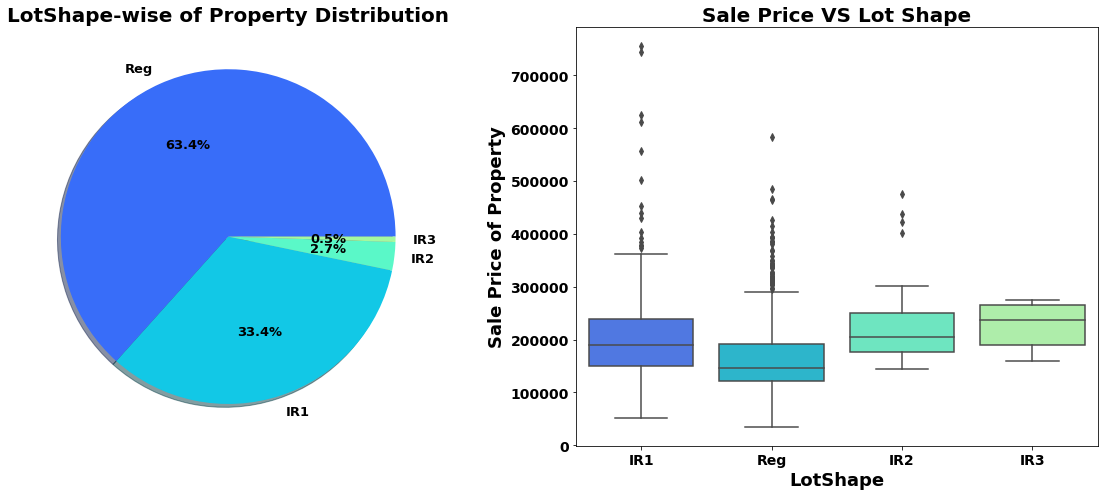

In [72]:
# Exploring LotShape Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotShape'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotShape-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotShape'], ax=ax[1])
ax[1].set_title('Sale Price VS Lot Shape',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotShape",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

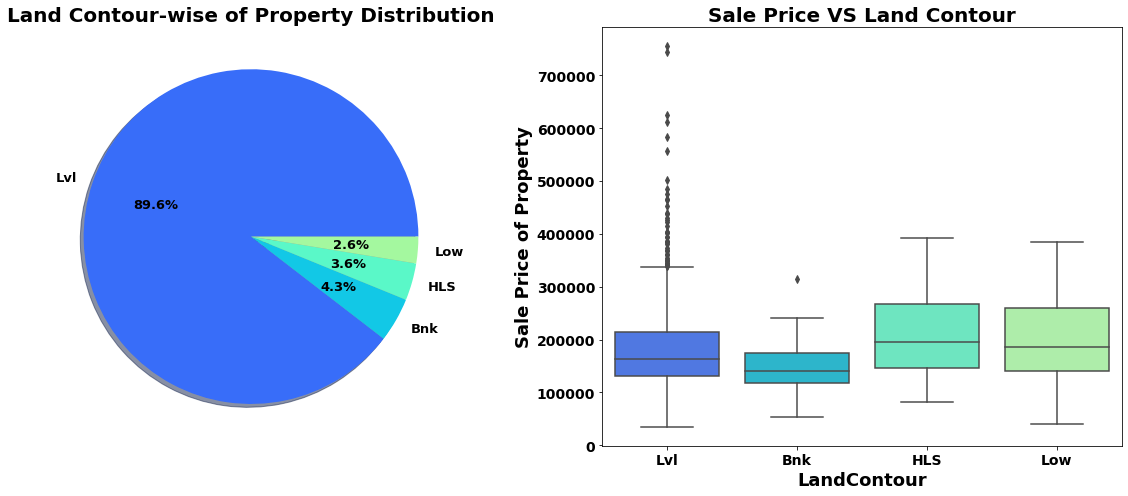

In [73]:
# Exploring LandContour Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandContour'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Land Contour-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandContour'], ax=ax[1])
ax[1].set_title('Sale Price VS Land Contour',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandContour",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

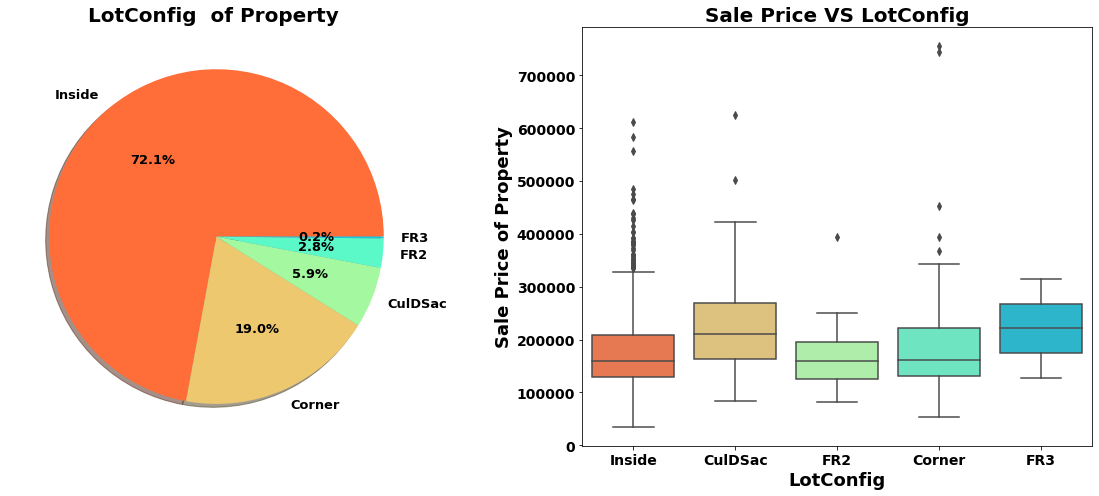

In [74]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotConfig'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotConfig  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotConfig'], ax=ax[1])
ax[1].set_title('Sale Price VS LotConfig',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotConfig",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

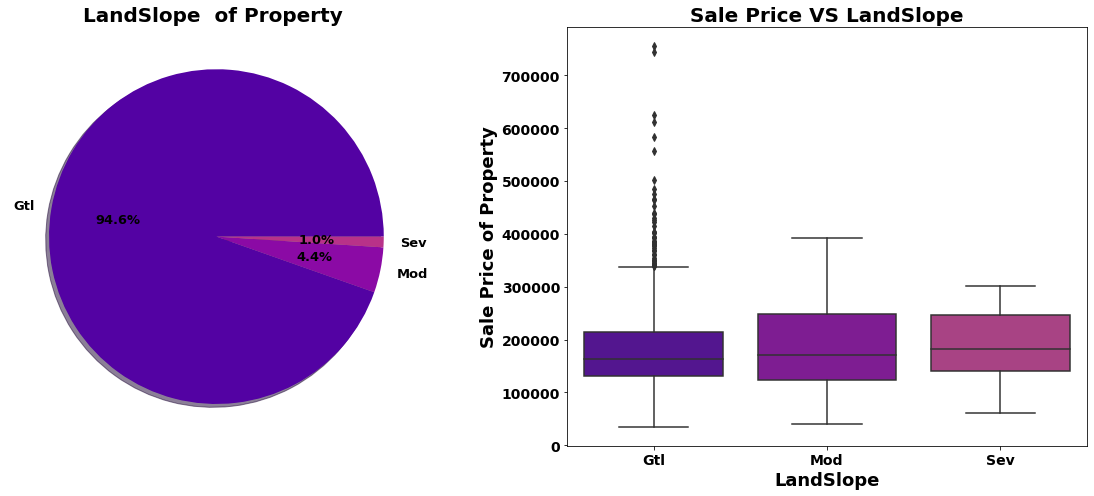

In [75]:
# Exploring LandSlope Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandSlope'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LandSlope  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandSlope'], ax=ax[1])
ax[1].set_title('Sale Price VS LandSlope',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandSlope",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

In [76]:
Feature_grp1 = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]

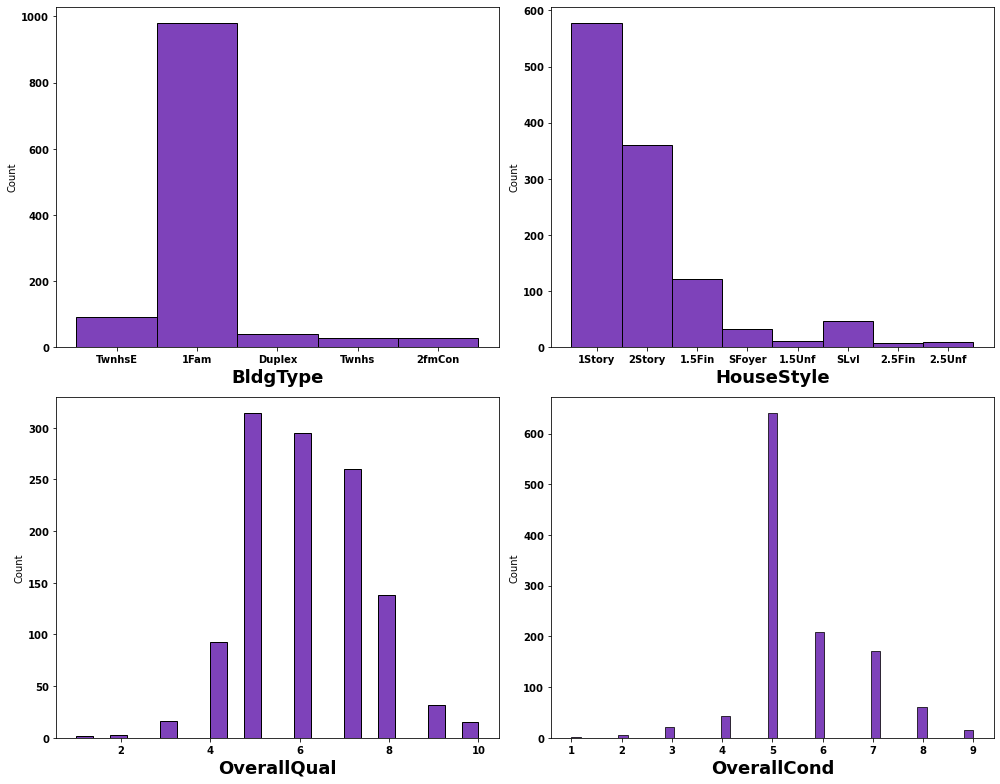

In [77]:
plt.figure(figsize=(14,11),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot( df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

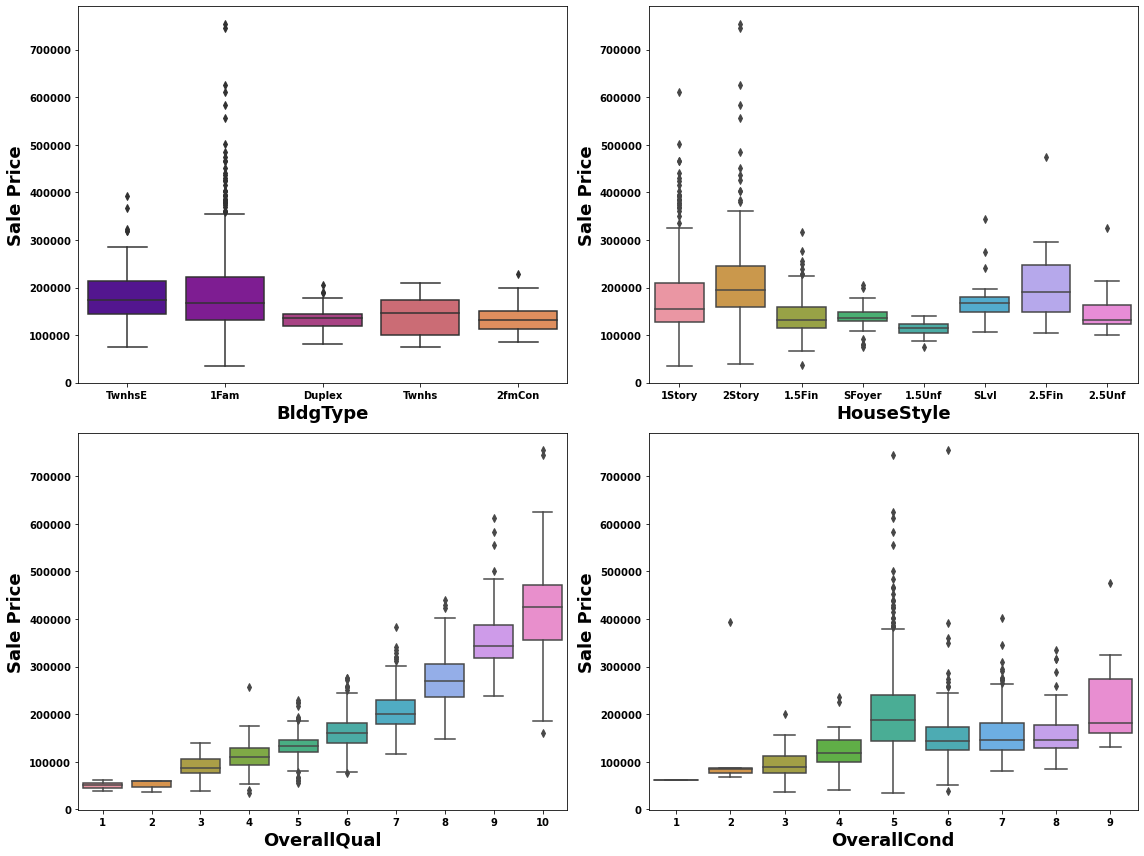

In [78]:
plt.figure(figsize=(16,12),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

In [80]:
df.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [81]:
Feature_grp2 = ["Year_SinceBuilt", "Year_SinceRemodAdded", 'Year_Since_Sold', "GarageAge"]

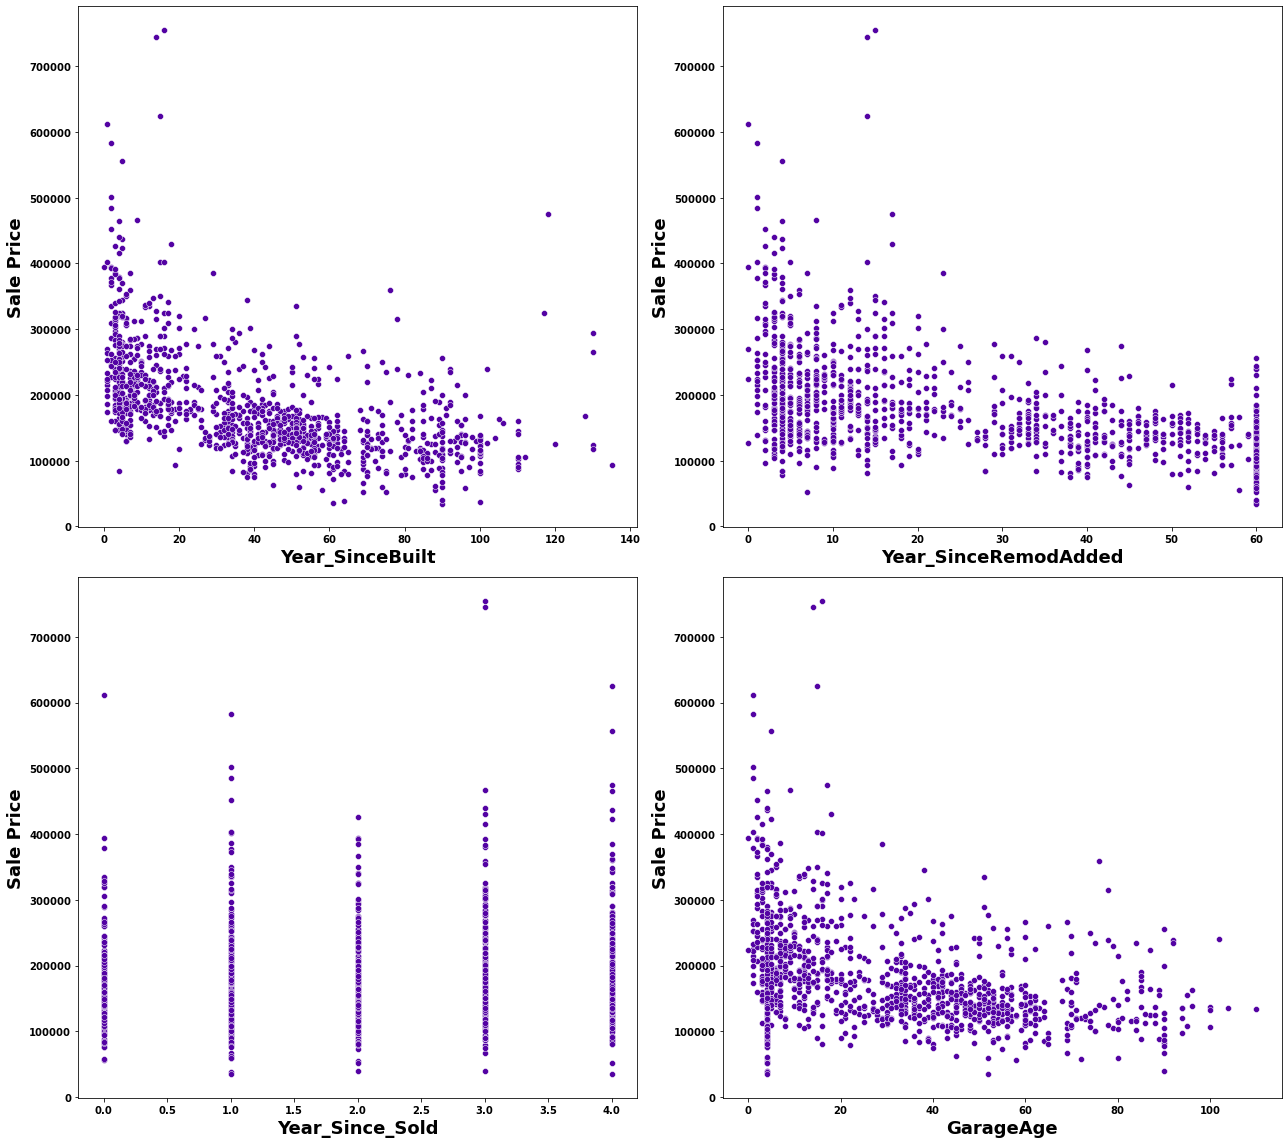

In [82]:
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in Feature_grp2:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

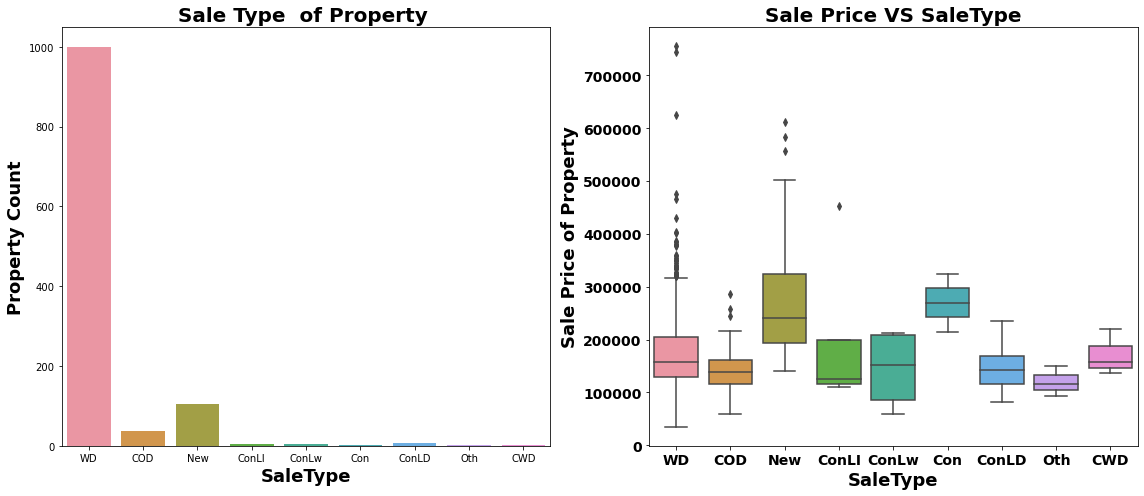

In [83]:
# Exploring SaleType Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleType',data=df,ax=ax[0])
ax[0].set_title('Sale Type  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('SaleType', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['SaleType'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleType',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleType",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

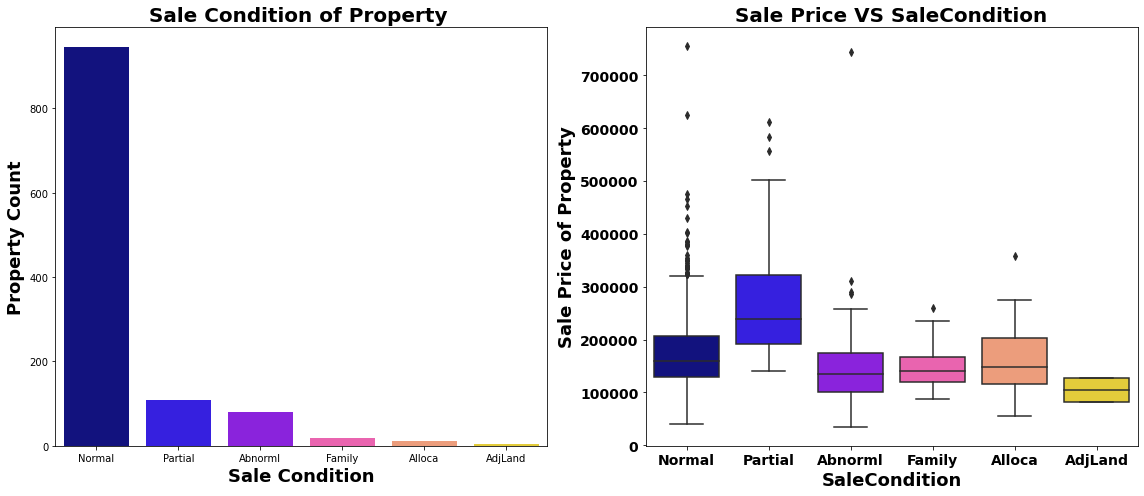

In [84]:
# Exploring SaleCondition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleCondition',data=df,ax=ax[0])
ax[0].set_title('Sale Condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Sale Condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['SaleCondition'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleCondition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleCondition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

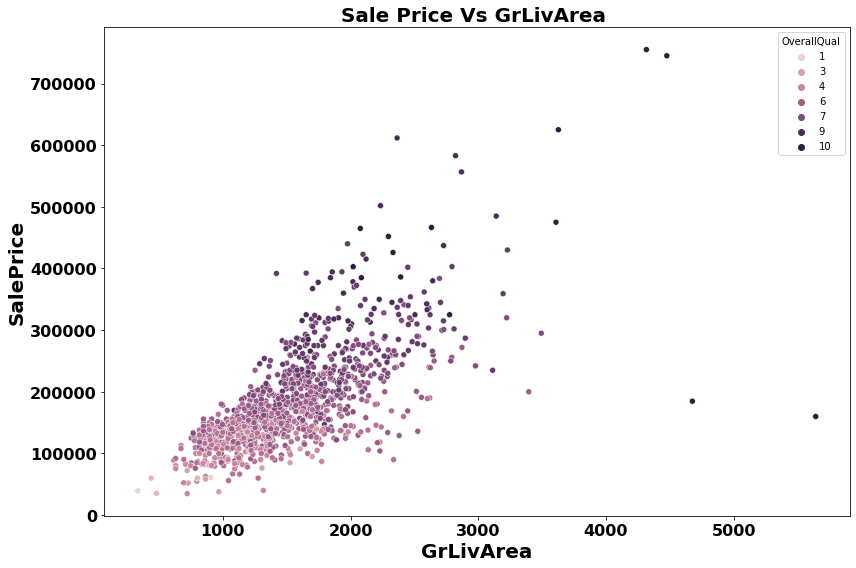

In [85]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs GrLivArea ",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

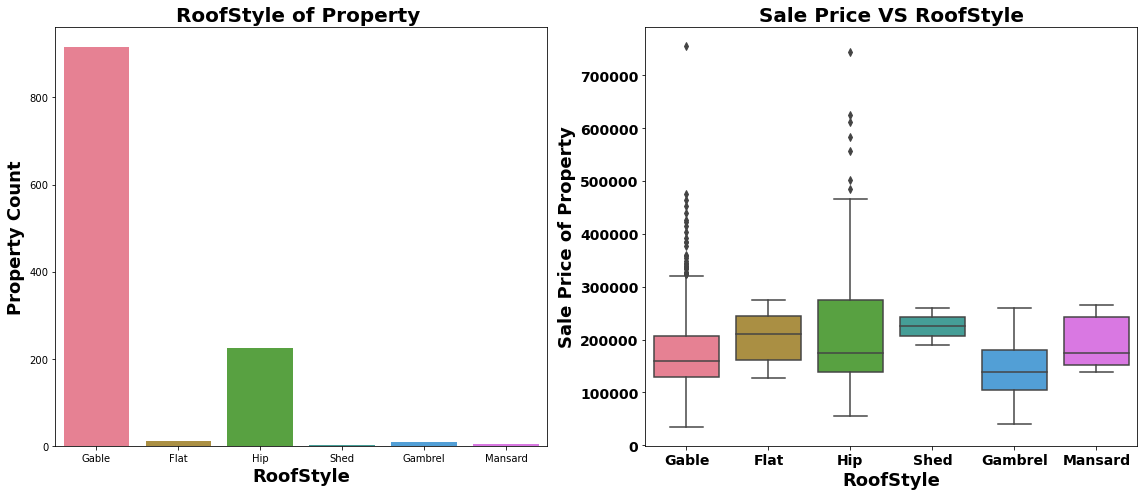

In [86]:
# Exploring RoofStyle Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('RoofStyle',data=df,ax=ax[0])
ax[0].set_title('RoofStyle of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofStyle', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['RoofStyle'], ax=ax[1])
ax[1].set_title('Sale Price VS RoofStyle',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("RoofStyle",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

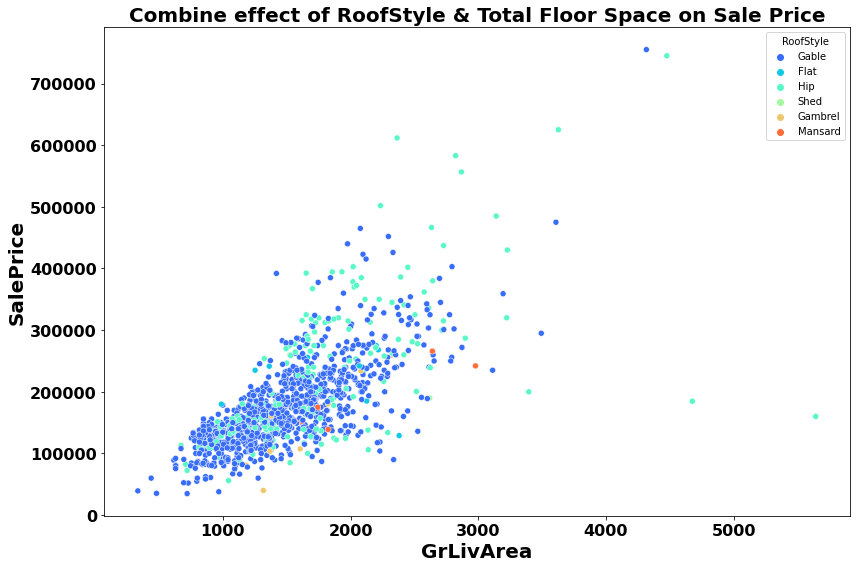

In [87]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['RoofStyle'])
plt.title("Combine effect of RoofStyle & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

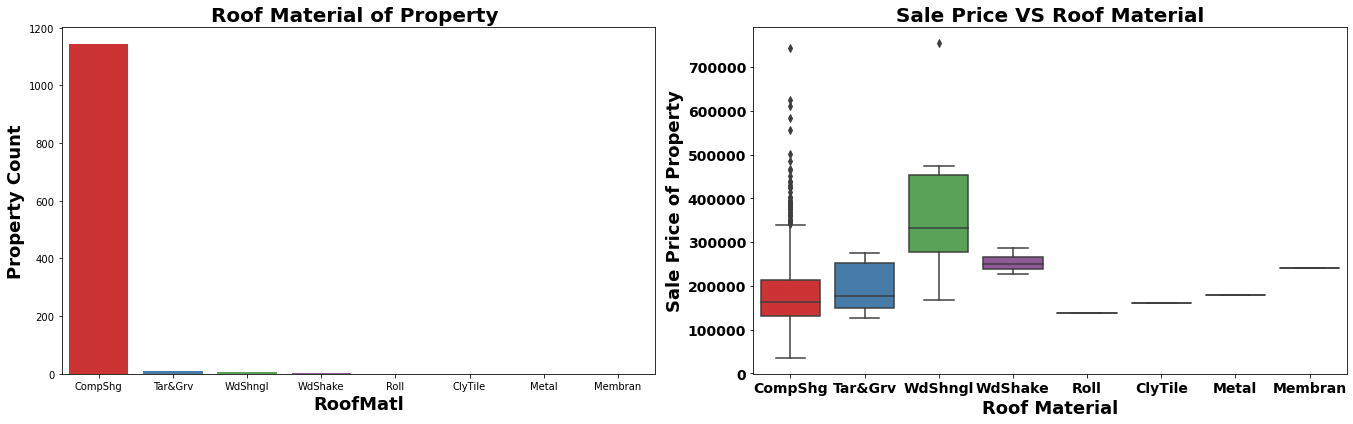

In [88]:
# Exploring RoofMatl Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(19,6))
sns.countplot('RoofMatl',data=df,ax=ax[0])
ax[0].set_title('Roof Material of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofMatl', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['RoofMatl'], ax=ax[1])
ax[1].set_title('Sale Price VS Roof Material',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Roof Material",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

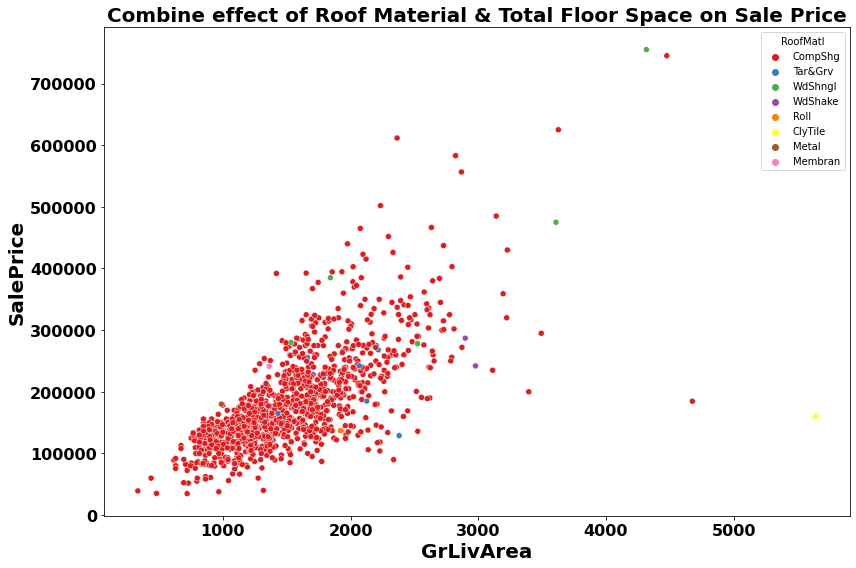

In [88]:
# Combine effect of RoofMatl & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['RoofMatl'])
plt.title("Combine effect of Roof Material & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [89]:
Feature_grp3 = ["Exterior1st","Exterior2nd", "MasVnrType", "ExterQual", "ExterCond"]

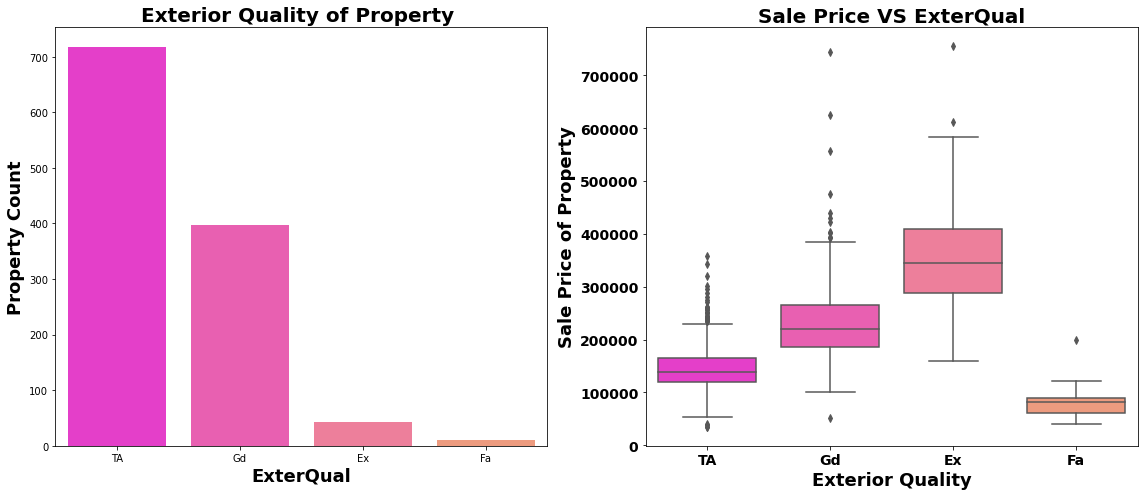

In [90]:
# Exploring ExterQual Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterQual',data=df,ax=ax[0])
ax[0].set_title('Exterior Quality of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('ExterQual', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['ExterQual'], ax=ax[1])
ax[1].set_title('Sale Price VS ExterQual',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Exterior Quality",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

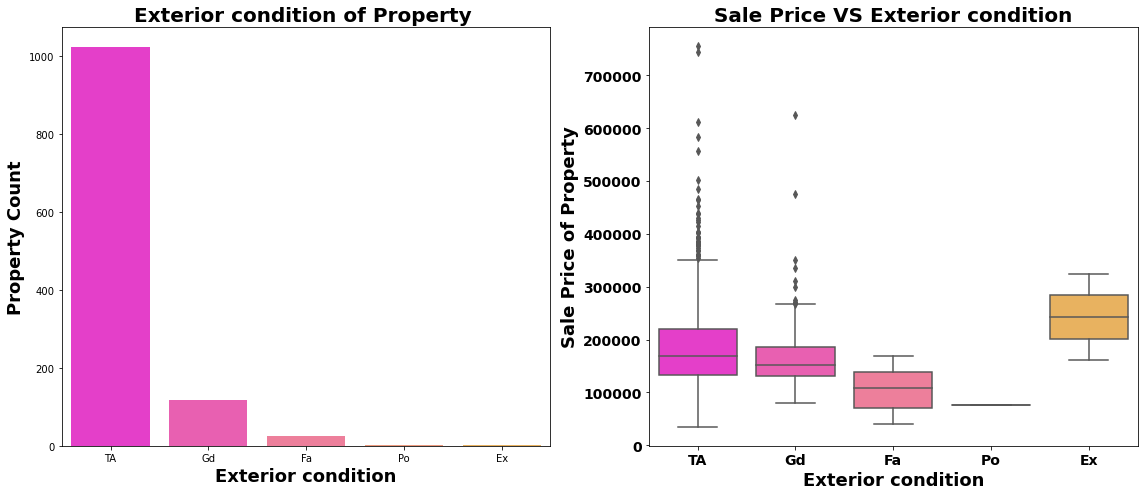

In [91]:
# Exploring Exterior condition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterCond',data=df,ax=ax[0])
ax[0].set_title('Exterior condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Exterior condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['ExterCond'], ax=ax[1])
ax[1].set_title('Sale Price VS Exterior condition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Exterior condition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

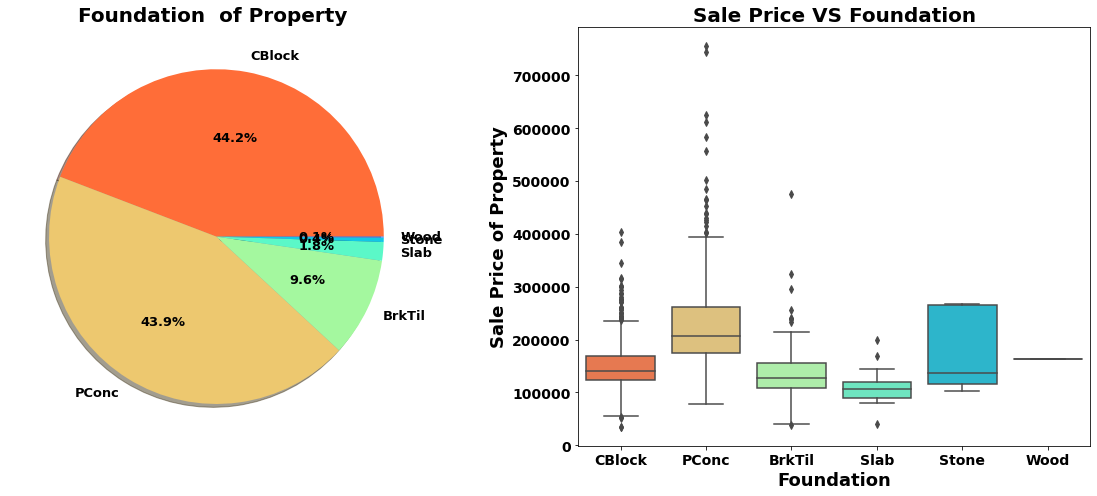

In [92]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Foundation'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Foundation  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['Foundation'], ax=ax[1])
ax[1].set_title('Sale Price VS Foundation',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Foundation",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

In [93]:
Feature_grp4= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

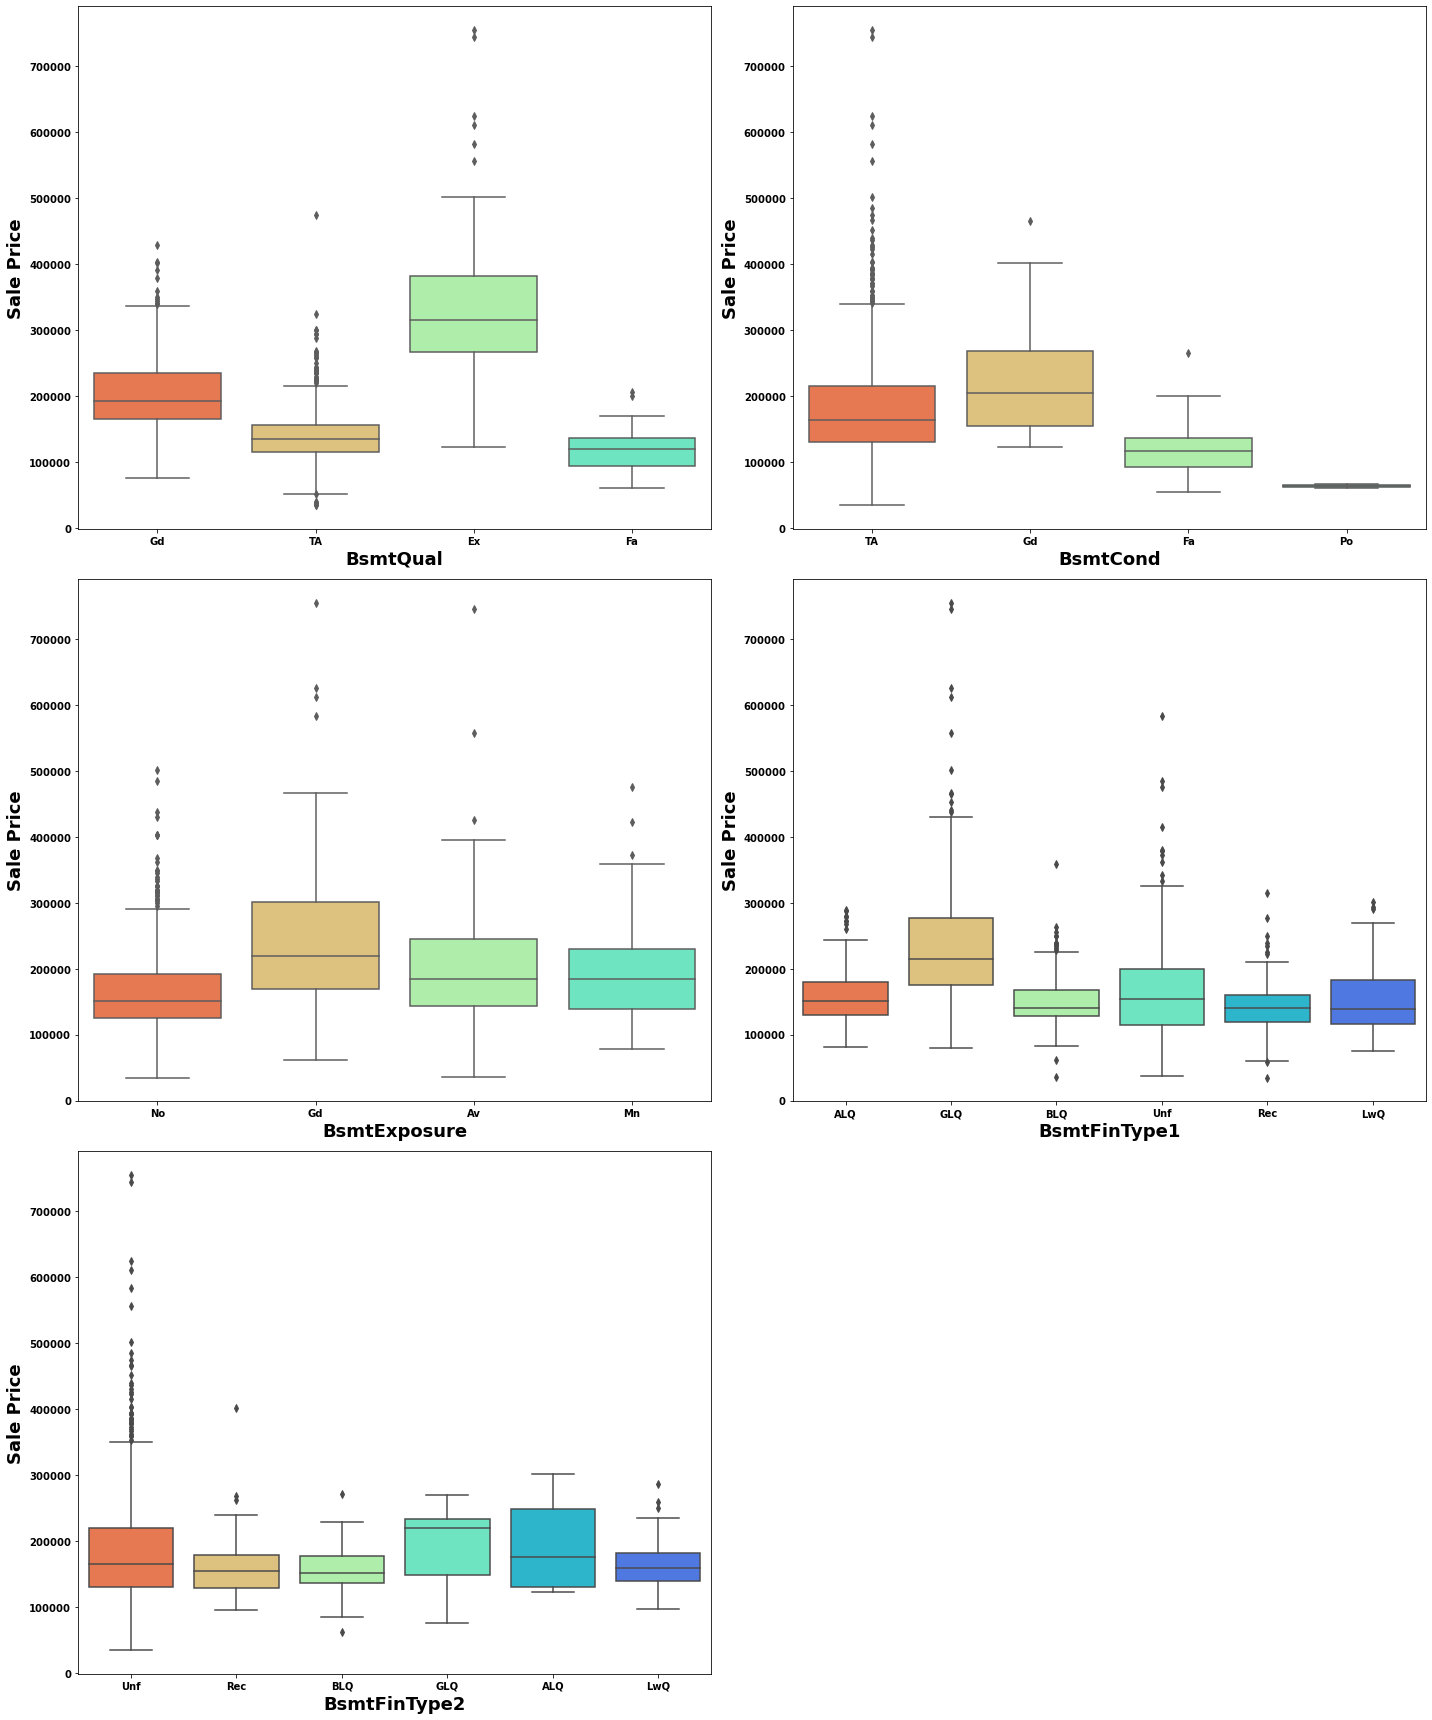

In [94]:
plt.figure(figsize=(20,24),facecolor='white')
plotnumber=1

for i in Feature_grp4:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

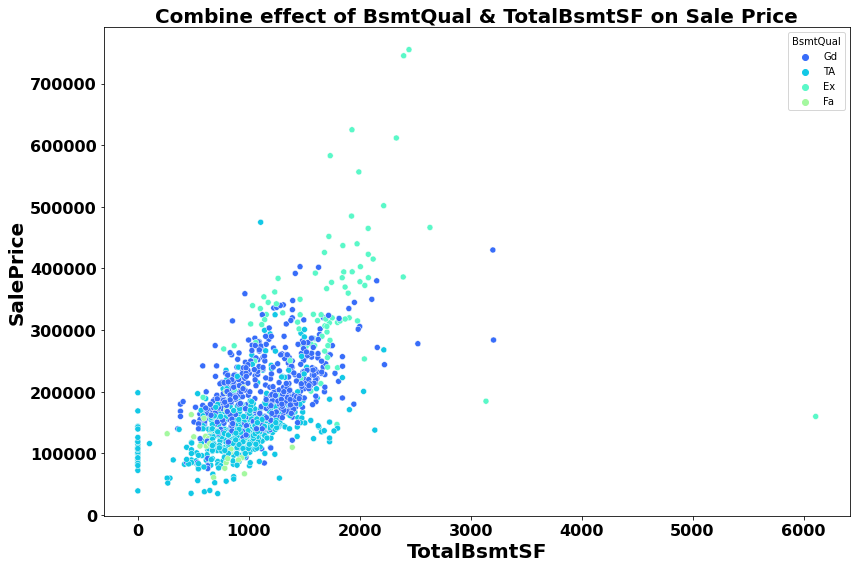

In [95]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['TotalBsmtSF'], hue =df['BsmtQual'])
plt.title("Combine effect of BsmtQual & TotalBsmtSF on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('TotalBsmtSF',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation :-
- **As Basement Quality increase in relatio to it sale Price increases.**

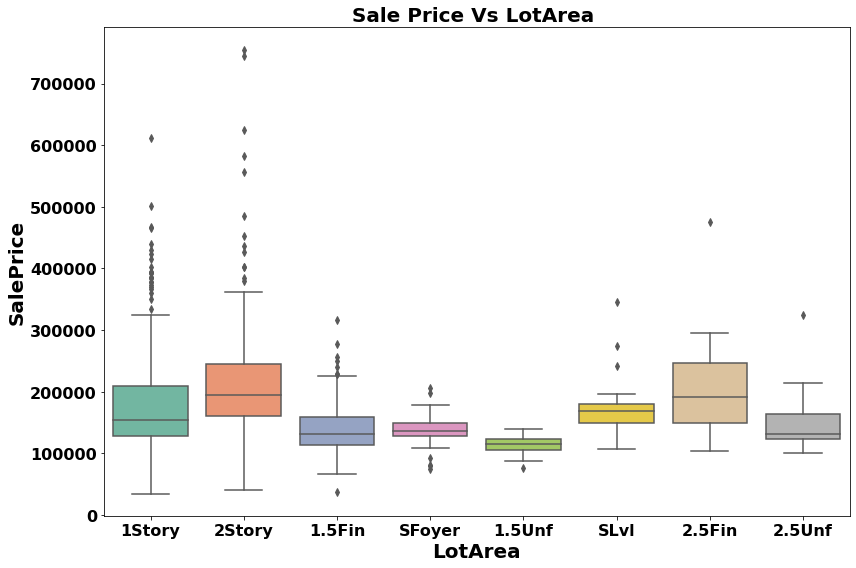

In [97]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set2')
plt.figure(figsize=(12,8))
sns.boxplot(y=df['SalePrice'], x=df['HouseStyle'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

## Feature Engineering

In [96]:
df['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
180       3
120       3
168       3
160       3
126       3
144       2
288       2
176       2
142       2
184       2
147       2
100       2
200       2
90        2
216       2
260       1
287       1
198       1
170       1
440       1
175       1
385       1
161       1
163       1
197       1
145       1
259       1
143       1
252       1
190       1
291       1
40        1
322       1
154       1
156       1
165       1
60        1
63        1
225       1
95        1
265       1
53        1
480       1
128       1
140       1
410       1
204       1
155       1
182       1
116       1
178       1
185       1
153       1
266       1
222       1
271       1
273       1
99        1
122       1
80        1
130       1
Name: ScreenPorch, dtype: int64

In [97]:
df['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
153       1
23        1
304       1
130       1
182       1
290       1
238       1
245       1
162       1
96        1
140       1
196       1
508       1
Name: 3SsnPorch, dtype: int64

In [98]:
df['MiscVal'].value_counts()

0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64

In [99]:
df['PoolArea'].value_counts()

0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64

In [100]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,Attchd,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,WD,Normal,128000,34,34,3,33.0
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,WD,Normal,268000,40,40,3,40.0
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,Attchd,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,WD,Normal,269790,14,13,3,13.0
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,Attchd,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,COD,Normal,190000,33,33,0,33.0
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,Attchd,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,WD,Normal,215000,33,10,1,33.0


### 1. Outliers Detection and Removal

In [104]:
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold'], float64: ['LotFrontage', 'MasVnrArea', 'GarageAge'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageTyp

In [105]:
# Grouping Numerical & Categorical features
Numerical_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                      'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                      'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                      'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold', 
                      'LotFrontage', 'MasVnrArea', 'GarageAge']

Categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

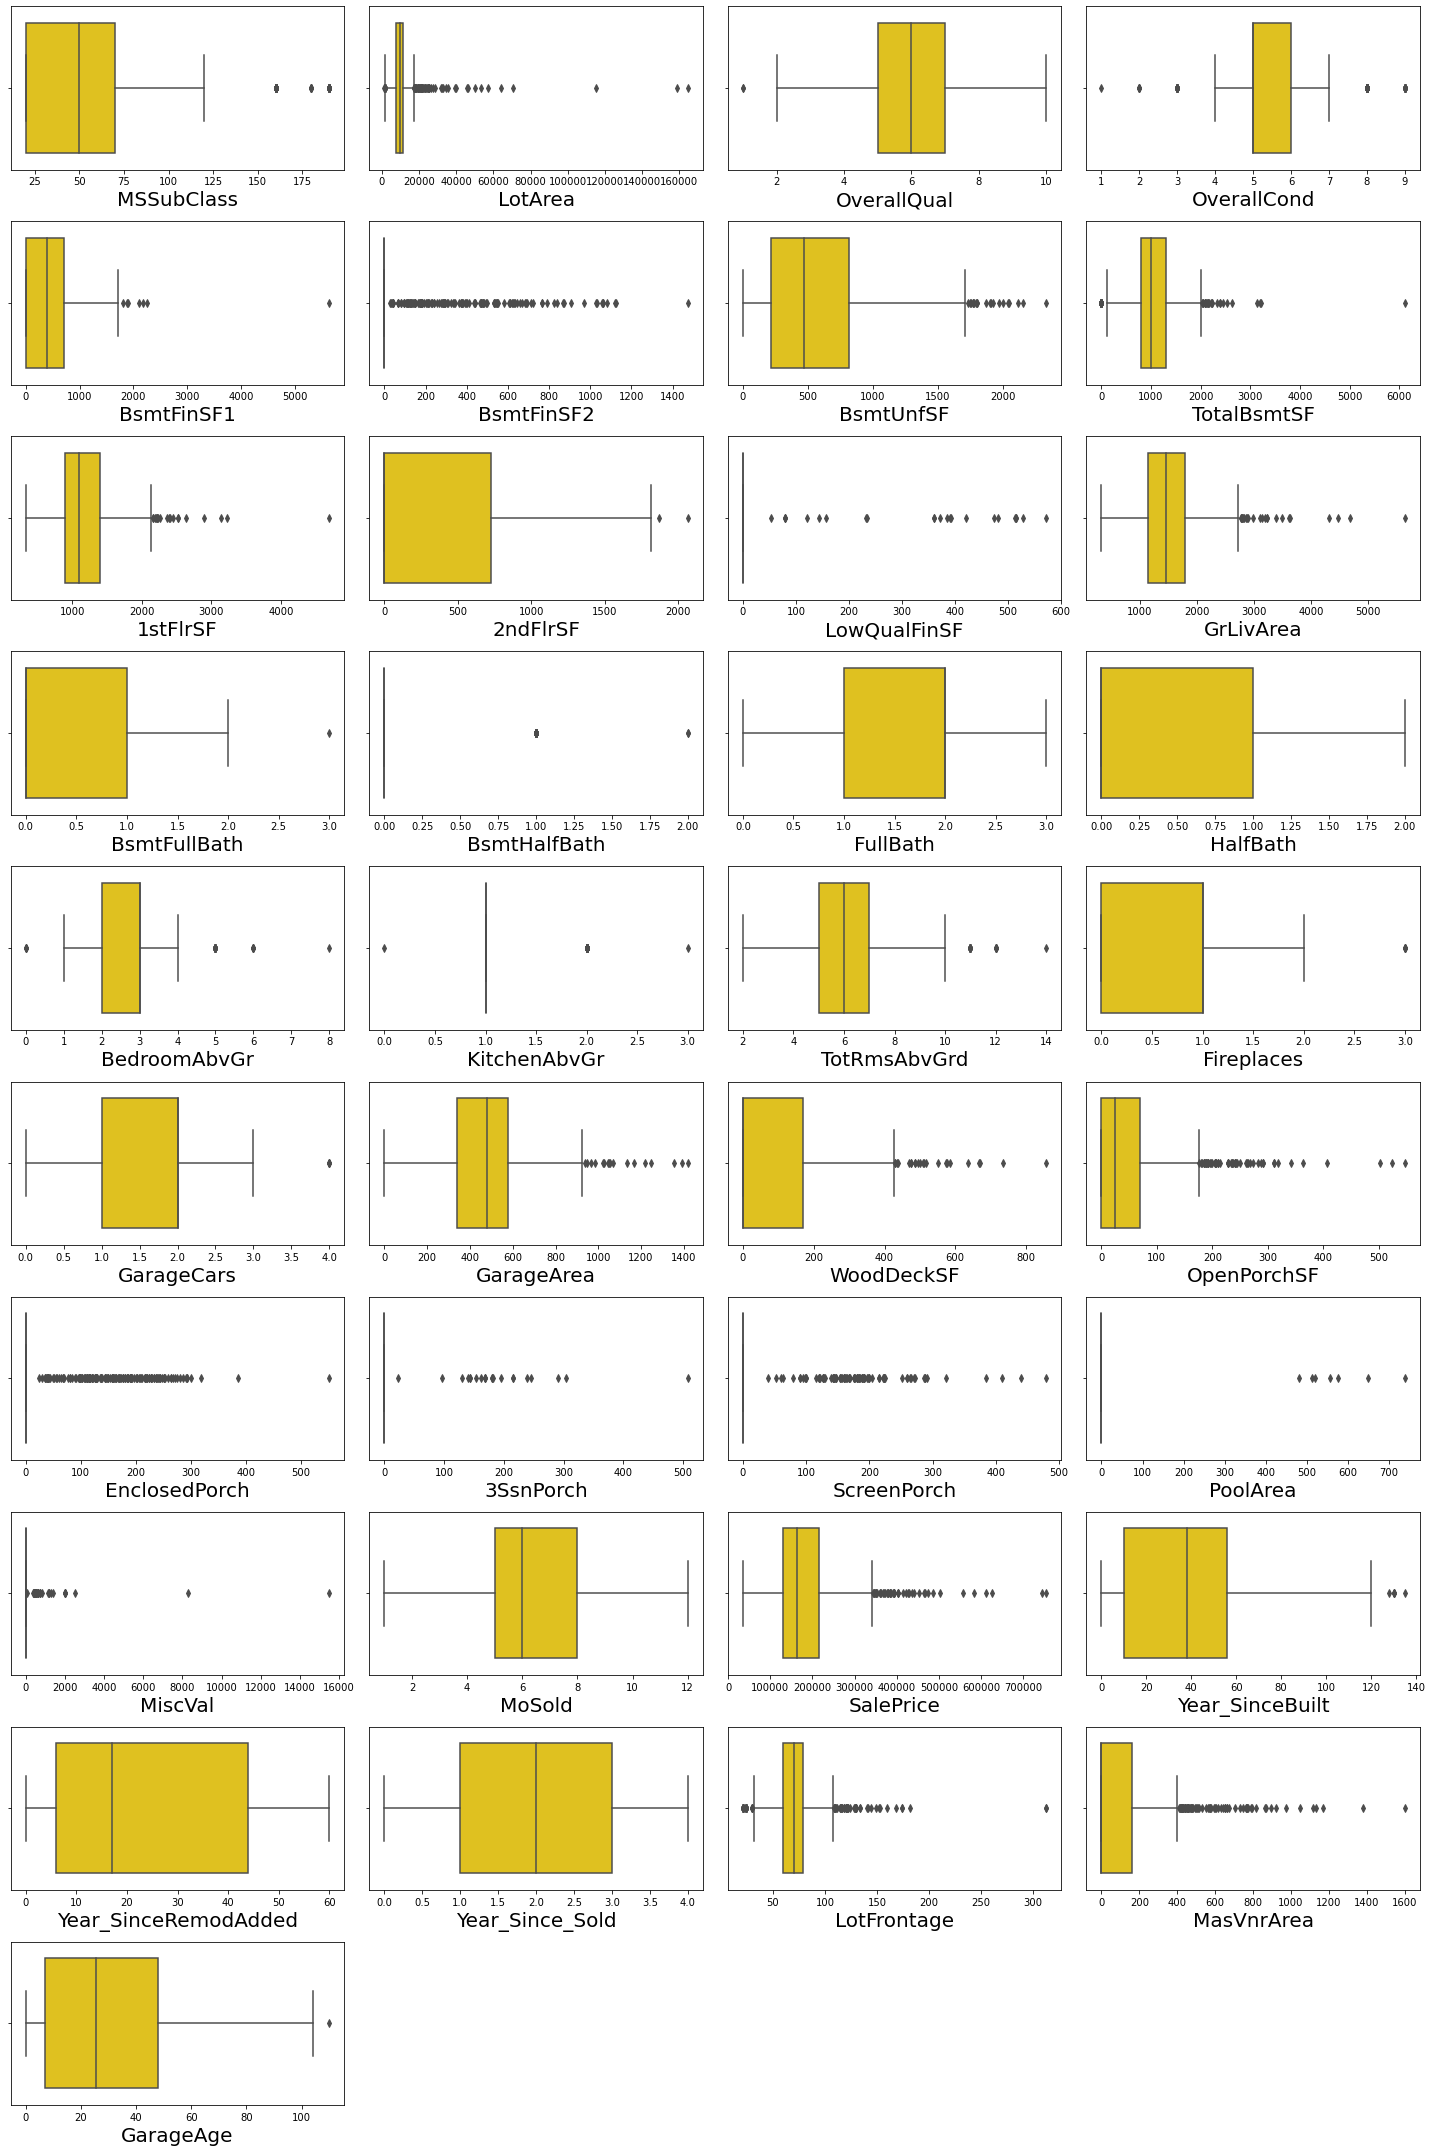

In [106]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [107]:
# Droping unnecessary column for further investigation
df.drop(['Id','Utilities'],axis=1,inplace=True)
dft.drop(['Id','Utilities'],axis=1,inplace=True)

In [108]:
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
dft.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [109]:
df.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
dft.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [110]:
df.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)
dft.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

### 2. Corrleation

In [111]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
MSSubClass,1.000000,-0.336234,-0.124151,0.070462,-0.056978,0.028215,-0.214042,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,-0.027639,-0.092408,-0.022609,0.017468,-0.016015,-0.060775,-0.023988,-0.056618,0.038595,-0.093390
LotFrontage,-0.336234,1.000000,0.296790,0.229981,-0.047851,0.188273,0.356180,0.374000,0.092807,0.001375,0.171842,0.047149,0.236946,-0.002082,0.318941,0.228494,0.260224,0.322750,0.087267,0.151044,0.022579,0.323851,-0.112000,-0.089513,0.004162,-0.028295
LotArea,-0.124151,0.296790,1.000000,0.107188,0.017513,0.120192,0.259733,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,0.158313,0.195162,0.216720,0.093080,0.015141,0.249499,-0.005506,-0.027228,0.035399,0.054091
OverallQual,0.070462,0.229981,0.107188,1.000000,-0.083167,0.403985,0.528285,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.596322,0.566782,0.227137,0.341030,0.090638,0.789185,-0.575800,-0.555945,0.048759,-0.427205
OverallCond,-0.056978,-0.047851,0.017513,-0.083167,1.000000,-0.135133,-0.162481,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.161996,-0.126021,0.012290,-0.024899,0.005519,-0.065642,0.377731,-0.080669,-0.055517,0.303182
MasVnrArea,0.028215,0.188273,0.120192,0.403985,-0.135133,1.000000,0.362330,0.384386,0.084498,0.014974,0.264357,0.197831,0.091339,-0.039438,0.277737,0.241040,0.340100,0.363537,0.152083,0.127876,0.012707,0.460535,-0.318562,-0.178583,0.013220,-0.210228
TotalBsmtSF,-0.214042,0.356180,0.259733,0.528285,-0.162481,0.362330,1.000000,0.461067,0.296654,0.009657,0.311120,-0.037014,0.036237,-0.065410,0.273895,0.328241,0.423592,0.492980,0.234848,0.249284,0.032920,0.595042,-0.386265,-0.280720,0.030448,-0.251091
GrLivArea,0.086448,0.374000,0.281360,0.599700,-0.065006,0.384386,0.461067,1.000000,0.036206,-0.013145,0.626275,0.403630,0.509273,0.097929,0.821845,0.464782,0.455707,0.459261,0.242525,0.368318,0.065385,0.707300,-0.198644,-0.295048,0.056401,-0.155869
BsmtFullBath,0.004556,0.092807,0.142387,0.101732,-0.039680,0.084498,0.296654,0.036206,1.000000,-0.150317,-0.070138,-0.020117,-0.149870,-0.034575,-0.055266,0.134348,0.105895,0.166060,0.161772,0.060848,-0.012877,0.212924,-0.164983,-0.104643,-0.060557,-0.085670
BsmtHalfBath,0.008207,0.001375,0.059282,-0.030702,0.091016,0.014974,0.009657,-0.013145,-0.150317,1.000000,-0.029929,-0.009073,0.051000,-0.049367,-0.021023,0.054955,-0.021730,-0.020305,0.051038,-0.050523,0.039928,-0.011109,0.028161,0.011375,0.052576,0.059867


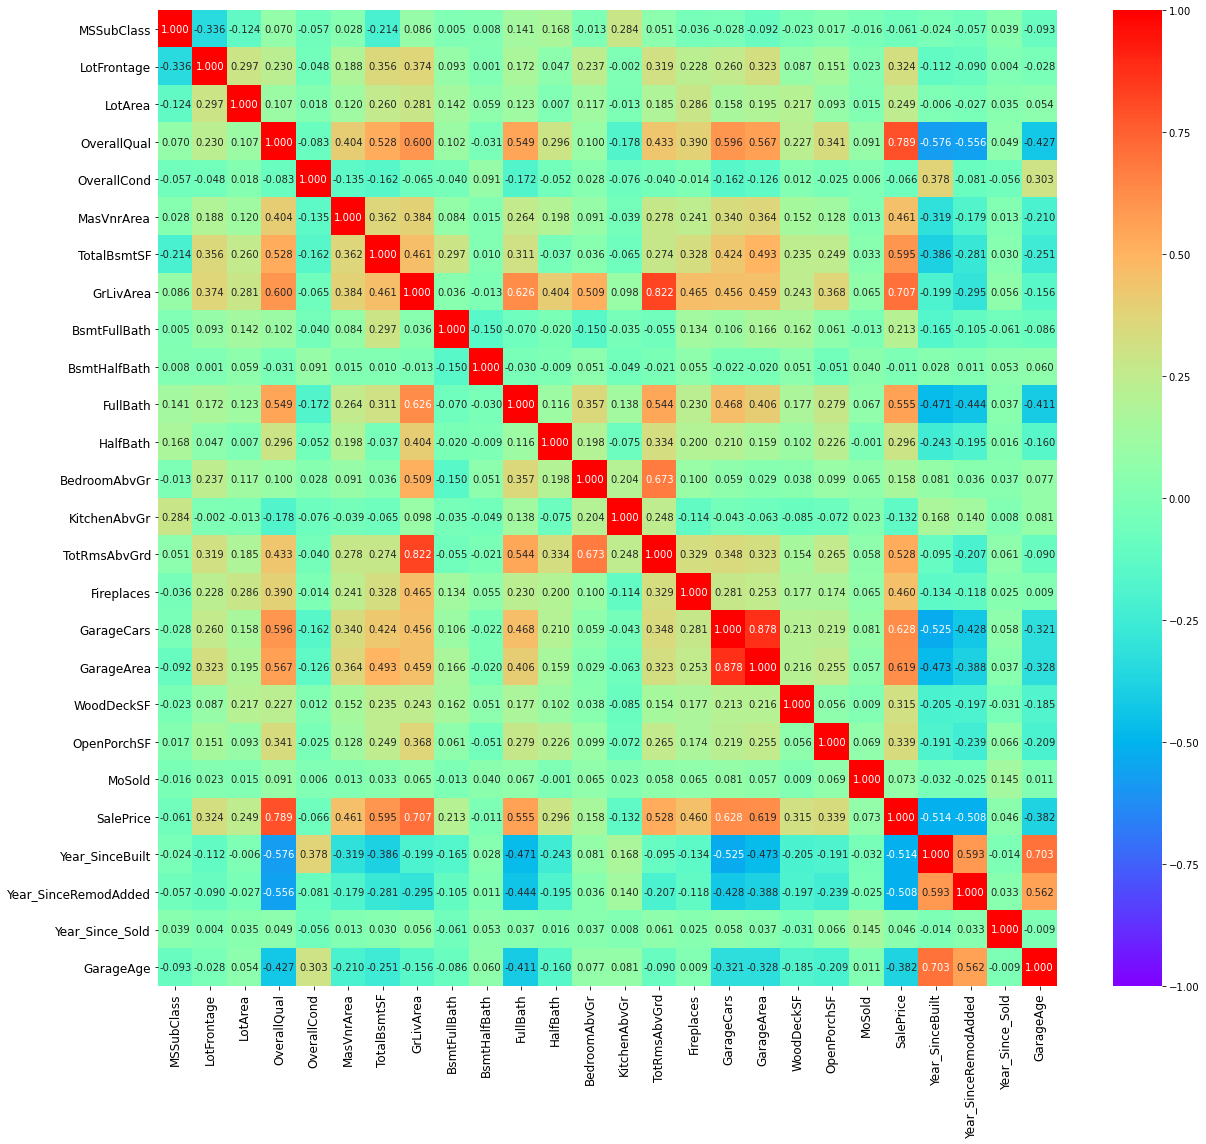

In [112]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=False, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

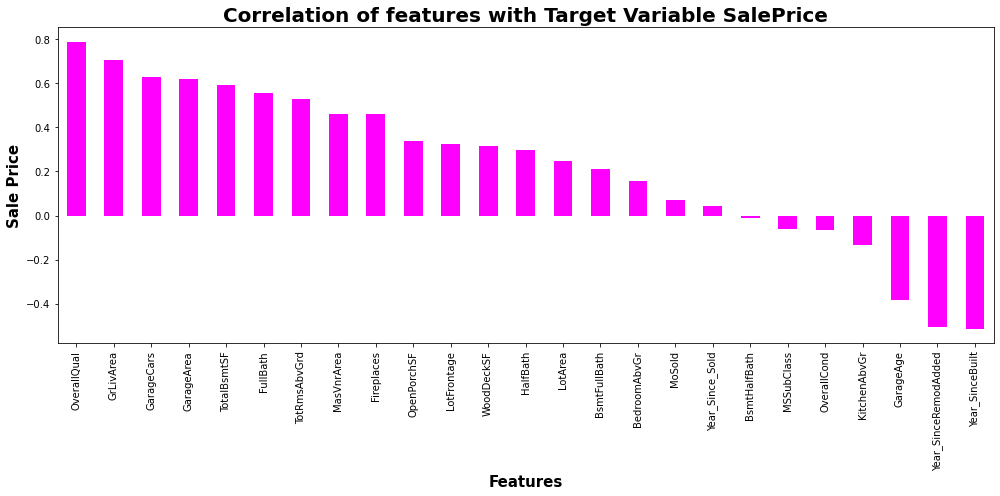

In [113]:
plt.figure(figsize = (14,7))
df.corr()['SalePrice'].drop(['SalePrice']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Sale Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable SalePrice',fontsize = 20,fontweight='bold')
plt.tight_layout()
plt.show()

### 3. Encoding Categorical Features

In [114]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since_Sold,GarageAge
0,120,3,70.0,4928,1,0,3,4,0,13,2,2,4,2,6,5,1,1,8,9,2,0.0,3,4,1,2,3,3,0,5,1078,1,4,1,4,958,0,0,2,0,2,1,3,5,6,1,1,1,2,440,4,4,2,0,205,2,8,4,128000,34,34,3,33.0
1,20,3,95.0,15865,1,0,3,4,1,12,2,2,0,2,8,6,0,5,12,13,2,0.0,2,2,2,3,1,1,0,4,2217,1,0,1,4,2217,1,0,2,0,4,1,2,8,6,1,1,2,2,621,4,4,2,81,207,10,8,4,268000,40,40,3,40.0
2,60,3,92.0,9920,1,0,3,1,0,15,2,2,0,5,7,5,1,1,7,7,2,0.0,2,4,2,2,3,0,2,5,1117,1,0,1,4,2013,1,0,2,1,3,1,3,8,6,1,1,2,2,455,4,4,2,180,130,6,8,4,269790,14,13,3,13.0
3,20,3,105.0,11751,1,0,3,4,0,14,2,2,0,2,6,6,3,1,8,9,1,480.0,3,4,1,2,3,3,1,5,1844,1,0,1,4,1844,0,0,2,0,3,1,3,7,6,1,1,1,2,546,4,4,2,0,122,1,0,4,190000,33,33,0,33.0
4,20,3,70.0,16635,1,0,3,2,0,14,2,2,0,2,6,7,1,1,4,4,3,126.0,2,4,1,2,3,3,0,5,1602,1,2,1,4,1602,0,1,2,0,3,1,2,8,6,1,1,0,2,529,4,4,2,240,0,6,8,4,215000,33,10,1,33.0


In [115]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    dft[i] = le.fit_transform(dft[i])
dft.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since,GarageAge
0,20,2,86.0,14157,1,0,1,0,0,21,2,0,0,2,9,5,3,0,9,11,3,200.0,2,3,2,0,2,1,2,5,1922,0,0,1,3,1922,1,0,2,0,3,1,2,8,5,1,1,0,3,676,4,4,2,178,51,7,5,2,4,4,3,5.0
1,120,2,65.0,5814,1,0,3,1,0,21,2,0,4,2,8,5,1,0,5,5,2,0.0,2,3,1,2,2,0,2,5,1220,0,2,1,3,1360,1,0,1,0,1,1,2,4,5,1,1,1,2,565,4,4,2,63,0,8,0,0,25,26,1,26.0
2,20,2,65.0,11838,1,3,3,4,0,4,2,0,0,2,8,5,3,0,9,11,2,0.0,2,3,2,2,2,0,5,5,1753,0,0,1,3,1788,0,0,2,0,3,1,0,7,5,1,1,1,2,522,4,4,2,202,151,6,5,2,8,9,1,9.0
3,70,2,75.0,12000,1,3,0,4,0,5,2,0,0,5,7,7,1,0,6,7,2,0.0,3,3,1,3,2,3,4,5,704,0,0,1,3,1564,0,0,1,1,3,1,1,7,5,1,1,2,1,234,4,4,2,0,0,7,5,2,68,60,1,69.0
4,60,2,86.0,14598,1,0,3,1,0,20,1,0,0,5,6,5,1,0,9,11,3,74.0,2,3,2,2,2,2,5,5,894,0,0,1,3,1933,0,0,2,1,4,1,2,9,5,1,3,0,3,668,4,4,2,100,18,1,5,2,2,3,2,3.0


### 4. Standard Scaling

In [116]:
# Splitting data in target and dependent feature
X = df.drop(['SalePrice'], axis =1)
Y = df['SalePrice']

In [117]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [118]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_test = scaler.fit_transform(dft)

# **Machine Learning Model Building**

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (817, 62)
Training Target Vector Size : (817,)
Test Feature Matrix Size: (351, 62)
Test Target Vector Size: (351,)


### **Finding best Random state**

In [122]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.875186298033824 on Random_state 135


### **Linear Regression**

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 20097.05579309613
Mean squared error : 868718000.5387533
Root Mean squared error : 29474.02246960454
 R2 Score :
87.5186298033824


In [124]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7662072724233104
Difference in R2 & CV Score: 10.897902561051353


### **Random Forest Regressor**

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 18245.0296373057
Mean squared error : 680983669.849416
Root Mean squared error : 26095.663813158997
R2 Score of Random Forest Regressor :
90.21591670027492


In [132]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8271264256315914
Difference in R2 & CV Score: 7.503274137115767


### **Decision Tree Regressor**

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 32061.21243523316
Mean squared error : 3034981421.165803
Root Mean squared error : 55090.66546308733
R2 Score of Decision Tree Regressor :
56.39467970741428


In [142]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.7093745077871182
Difference in R2 & CV Score: -14.542771071297544


### **Extra Trees Regressor**

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 17501.656424870467
Mean squared error : 672482129.7249866
Root Mean squared error : 25932.260405236302
R2 Score of Extra Tree Regressor :
90.3380632075058


In [154]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.831402363321508
Difference in R2 & CV Score: 7.197826875355005


### **Ridge Regression**

In [143]:
from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
rd = Ridge()
rd.fit(X_train, Y_train)
y_pred = rd.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 20090.342142178335
Mean squared error : 868587960.7881687
Root Mean squared error : 29471.81638087766
R2 Score of XGB Regressor :
87.52049815912765


In [144]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rd, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rd,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : Ridge() :

Mean CV Score : 0.7666037684644635
Difference in R2 & CV Score: 10.8601213126813


### **XGB Regressor**

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 135, test_size=0.33)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 19112.426550356216
Mean squared error : 927210436.1906452
Root Mean squared error : 30450.130314838476
R2 Score of XGB Regressor :
86.67823540310482


In [146]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.8205944138764742
Difference in R2 & CV Score: 4.6187940154573965


***We can see that Random Forest Regressor gives maximum R2 score of 90.50 and with cross validation score of 83.30 %.***

# Hyper Parameter Tuning : GridSearchCV

In [149]:
from sklearn.model_selection import GridSearchCV

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=135, test_size=0.33)

In [158]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [202]:
parameter = {
 'bootstrap': [True, False],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4 ],
 'n_estimators': [100, 500,1000,1500,2000]}

In [203]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.814 total time=   1.2s
[CV 2/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.861 total time=   1.1s
[CV 3/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.163 total time=   1.1s
[CV 4/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.793 total time=   1.1s
[CV 5/5; 1/30] START bootstrap=True, max_features=auto, min_samples_le

In [174]:
GCV.best_params_

{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}

## **Final Model**

In [133]:
Final_mod=RandomForestRegressor(max_depth = None, bootstrap = True, max_features='sqrt', min_samples_leaf = 1,
                                n_estimators = 100 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 90.39311489727983
mean_squared_error: 668650467.566633
mean_absolute_error: 17782.643231865284
RMSE value: 25858.276577657547


## Saving Final Model

In [134]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Surprise_Housing_Price_Prediction.pkl")

['Surprise_Housing_Price_Prediction.pkl']

## **Predictions of Test Dataset Using Final Model**

In [135]:
# Loading the saved model
model = joblib.load("Surprise_Housing_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_scale_test)
prediction

array([357468.723 , 245796.428 , 241638.701 , 174501.681 , 200088.5785,
       100598.11  , 140892.191 , 287091.4505, 229725.536 , 173295.788 ,
        93347.513 , 147461.561 , 121411.1855, 178888.091 , 326950.6715,
       134673.024 , 121776.1595, 130836.5885, 171777.037 , 207701.781 ,
       164326.678 , 136720.416 , 157670.199 ,  94983.352 , 101195.2975,
       127355.274 , 180998.37  , 150582.9605, 171264.298 , 109322.386 ,
       164129.11  , 187951.5235, 233295.953 , 162569.4095, 114449.942 ,
       170900.325 , 191946.077 , 121130.924 , 164045.5185, 159106.5835,
       110538.82  , 300531.7565, 201947.968 , 184288.53  , 139320.192 ,
       147429.3695, 132349.979 ,  99982.0705, 211640.1345, 331529.8865,
       148486.21  , 190833.9985, 104631.054 , 102026.2385, 292634.6785,
       129879.3975, 149016.506 , 186536.3145, 120461.932 , 253716.96  ,
       111849.79  , 176619.43  , 130540.03  , 146372.3935, 199396.334 ,
       107672.358 , 157004.8385, 207006.664 , 137443.074 , 16430

In [136]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Test_data_Predication = pd.DataFrame()
Test_data_Predication['SalePrice']=prediction
Test_data_Predication.head()

,SalePrice
0,357468.7230
1,245796.4280
2,241638.7010
3,174501.6810
4,200088.5785


In [137]:
Final_test_data = pd.concat([dft, Test_data_Predication], axis=1)
Final_test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,Year_SinceBuilt,Year_SinceRemodAdded,Year_Since,GarageAge,SalePrice
0,20,2,86.0,14157,1,0,1,0,0,21,2,0,0,2,9,5,3,0,9,11,3,200.0,2,3,2,0,2,1,2,5,1922,0,0,1,3,1922,1,0,2,0,3,1,2,8,5,1,1,0,3,676,4,4,2,178,51,7,5,2,4,4,3,5.0,357468.7230
1,120,2,65.0,5814,1,0,3,1,0,21,2,0,4,2,8,5,1,0,5,5,2,0.0,2,3,1,2,2,0,2,5,1220,0,2,1,3,1360,1,0,1,0,1,1,2,4,5,1,1,1,2,565,4,4,2,63,0,8,0,0,25,26,1,26.0,245796.4280
2,20,2,65.0,11838,1,3,3,4,0,4,2,0,0,2,8,5,3,0,9,11,2,0.0,2,3,2,2,2,0,5,5,1753,0,0,1,3,1788,0,0,2,0,3,1,0,7,5,1,1,1,2,522,4,4,2,202,151,6,5,2,8,9,1,9.0,241638.7010
3,70,2,75.0,12000,1,3,0,4,0,5,2,0,0,5,7,7,1,0,6,7,2,0.0,3,3,1,3,2,3,4,5,704,0,0,1,3,1564,0,0,1,1,3,1,1,7,5,1,1,2,1,234,4,4,2,0,0,7,5,2,68,60,1,69.0,174501.6810
4,60,2,86.0,14598,1,0,3,1,0,20,1,0,0,5,6,5,1,0,9,11,3,74.0,2,3,2,2,2,2,5,5,894,0,0,1,3,1933,0,0,2,1,4,1,2,9,5,1,3,0,3,668,4,4,2,100,18,1,5,2,2,3,2,3.0,200088.5785
